<a href="https://colab.research.google.com/github/popsoft01/Data-Wrangling/blob/main/Data_Wrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Data Wrangling Challenge**
### Position: Junior Software Engineer.
### Expected outcome: git repository with dataset and script.

Challenge

Write a script to get normalized CSV data file of Road Safety Facts and Figures in the EU.

Please publish your results in a git repo (GitHub). Include both script and your resulting data. The documentation should be included in the README.md file and it must be clear to follow.

More details:

Use the following Wikipedia page and get the data from the “European Union Road Safety Facts and Figures” table: https://en.wikipedia.org/wiki/Road_safety_in_Europe. <br>
Resulting CSV file should only include the following columns: Country, Year, Area, Population, GDP per capita, Population density, Vehicle ownership, Total road deaths, Road deaths per Million Inhabitants. <br>

        Note that “Year” column value is always 2018.<br>

Data should be sorted by “Road deaths per Million Inhabitants” column.
We want a script for this and we want this script to be in python or nodejs so that you can demonstrate your knowledge of the given programming languages.
Your git repo should include all dependencies in standard way so that it can be run in the CI/CD.<br>

Please, use simple and built-in libraries where possible rather than use a framework.


In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [ ]:
#getting data from the scraping web url
wikipedia_url = "https://en.wikipedia.org/wiki/Road_safety_in_Europe"
table_class="wikitable sortable jquery-tablesorter"
response=requests.get(wikipedia_url)
response.status_code

200

In [ ]:
#converting the crap data to table
soup = BeautifulSoup(response.text, 'html.parser')
EU_road_safety_facts_and_figures=soup.find('table',{'class':"wikitable"})
EU_road_safety_facts_and_figures

<table class="wikitable sortable">
<caption>European Union Road Safety Facts and Figures
</caption>
<tbody><tr>
<th>Country
</th>
<th>Area
<p>(thousands of km<sup>2</sup>)<sup class="reference" id="cite_ref-21"><a href="#cite_note-21">[21]</a></sup>
</p>
</th>
<th>Population in 2018<sup class="reference" id="cite_ref-22"><a href="#cite_note-22">[22]</a></sup>
</th>
<th>GDP per capita in 2018<sup class="reference" id="cite_ref-23"><a href="#cite_note-23">[23]</a></sup>
</th>
<th>Population density
<p>(inhabitants per km<sup>2</sup>) in 2017<sup class="reference" id="cite_ref-24"><a href="#cite_note-24">[24]</a></sup>
</p>
</th>
<th>Vehicle ownership
<p>(per thousand inhabitants) in 2016<sup class="reference" id="cite_ref-25"><a href="#cite_note-25">[25]</a></sup>
</p>
</th>
<th>Road Network Length
<p>(in km) in 2013<sup class="reference" id="cite_ref-26"><a href="#cite_note-26">[26]</a></sup>
</p>
</th>
<th>Total Road Deaths in 2018<sup class="reference" id="cite_ref-etsc.eu_27-0"><a hr

In [ ]:
#creating data frame from table 
df=pd.read_html(str(EU_road_safety_facts_and_figures))
df=pd.DataFrame(df[0])
df.head(0)

,Country,Area (thousands of km2)[21],Population in 2018[22],GDP per capita in 2018[23],Population density (inhabitants per km2) in 2017[24],Vehicle ownership (per thousand inhabitants) in 2016[25],Road Network Length (in km) in 2013[26],Total Road Deaths in 2018[27],Road deaths per Million Inhabitants in 2018[27],Number of People Killed per Billion km[27],Number of Seriously Injured in 2017/2018[27]


In [ ]:

year = []
for i in df.Country:
  year.append(2018)
year

[2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018]

In [ ]:
#adding year to All the column
year_column = pd.Series(year, name='Year')
df2 = pd.concat([df, year_column], axis=1)
df2

,Country,Area (thousands of km2)[21],Population in 2018[22],GDP per capita in 2018[23],Population density (inhabitants per km2) in 2017[24],Vehicle ownership (per thousand inhabitants) in 2016[25],Road Network Length (in km) in 2013[26],Total Road Deaths in 2018[27],Road deaths per Million Inhabitants in 2018[27],Number of People Killed per Billion km[27],Number of Seriously Injured in 2017/2018[27],Year
0,Austria,83.9,8822267,38000,107,665,124115,409,45,5.2 (2015–2017),"7,664 (2017)",2018
1,Belgium,30.5,11398589,35300,376,585,155210,590,52,NaN,"3,757 (2017)",2018
2,Bulgaria,111.0,7050034,6500,65,516,19678,611,88,NaN,"8,680 (2018)",2018
3,Croatia,56.5,4105493,"11,500†a",74,416,26820,317,77,12.7 (2016–2018),2.776 (2018),2018
4,Cyprus,9.3,864236,23300,128,726,9765,49,57,NaN,348 (2018),2018
5,Czech Republic,78.9,10610055,17600,137,570,130680,656,62,10.1 (2015–2015),"2,395 (2018)",2018
6,Denmark,42.9,5781190,47600,137,508,74130,175,30,3.7 (2016–2018),"1,756 (2017)",2018
7,Estonia,45.2,1319133,15100,30,620,58787,67,51,5.7 (2016–2018),460 (2018),2018
8,Finland,338.4,5513130,36600,18,732,78093,225,43,4.7 (2014–2016),409 (2017),2018
9,France,632.8,66926166,32800,123,590,1071823,3265,48,5.8 (2015–2017),"27,732 (2017)",2018


In [ ]:
#restructure the column of the table
selected_column = ['Country', 'Year', 'Area (thousands of km2)[21]', 'Population in 2018[22]', 'GDP per capita in 2018[23]', 'Population density (inhabitants per km2) in 2017[24]', 'Vehicle ownership (per thousand inhabitants) in 2016[25]', 'Total Road Deaths in 2018[27]', 'Road deaths per Million Inhabitants in 2018[27]' ]
df_selected = df2[selected_column]
df_selected

,Country,Year,Area (thousands of km2)[21],Population in 2018[22],GDP per capita in 2018[23],Population density (inhabitants per km2) in 2017[24],Vehicle ownership (per thousand inhabitants) in 2016[25],Total Road Deaths in 2018[27],Road deaths per Million Inhabitants in 2018[27]
0,Austria,2018,83.9,8822267,38000,107,665,409,45
1,Belgium,2018,30.5,11398589,35300,376,585,590,52
2,Bulgaria,2018,111.0,7050034,6500,65,516,611,88
3,Croatia,2018,56.5,4105493,"11,500†a",74,416,317,77
4,Cyprus,2018,9.3,864236,23300,128,726,49,57
5,Czech Republic,2018,78.9,10610055,17600,137,570,656,62
6,Denmark,2018,42.9,5781190,47600,137,508,175,30
7,Estonia,2018,45.2,1319133,15100,30,620,67,51
8,Finland,2018,338.4,5513130,36600,18,732,225,43
9,France,2018,632.8,66926166,32800,123,590,3265,48


In [ ]:
data = df_selected.rename(columns={"Area (thousands of km2)[21]": "Area","Population in 2018[22]": "Population", "GDP per capita in 2018[23]": "GDP per capita", "Population density (inhabitants per km2) in 2017[24]" : "Population density", "Vehicle ownership (per thousand inhabitants) in 2016[25]" : "Vehicle ownership", "Total Road Deaths in 2018[27]" : "Total road deaths", "Road deaths per Million Inhabitants in 2018[27]": "Road deaths per Million Inhabitants" })
data

,Country,Year,Area,Population,GDP per capita,Population density,Vehicle ownership,Total road deaths,Road deaths per Million Inhabitants
0,Austria,2018,83.9,8822267,38000,107,665,409,45
1,Belgium,2018,30.5,11398589,35300,376,585,590,52
2,Bulgaria,2018,111.0,7050034,6500,65,516,611,88
3,Croatia,2018,56.5,4105493,"11,500†a",74,416,317,77
4,Cyprus,2018,9.3,864236,23300,128,726,49,57
5,Czech Republic,2018,78.9,10610055,17600,137,570,656,62
6,Denmark,2018,42.9,5781190,47600,137,508,175,30
7,Estonia,2018,45.2,1319133,15100,30,620,67,51
8,Finland,2018,338.4,5513130,36600,18,732,225,43
9,France,2018,632.8,66926166,32800,123,590,3265,48


In [ ]:
data.sort_values(by=['Road deaths per Million Inhabitants'], inplace=True)
data

,Country,Year,Area,Population,GDP per capita,Population density,Vehicle ownership,Total road deaths,Road deaths per Million Inhabitants
27,United Kingdom,2018,248.5,66273576,32400,273,544,1825,28
6,Denmark,2018,42.9,5781190,47600,137,508,175,30
19,Netherlands,2018,41.5,17181084,41500,508,543,678,31
13,Ireland,2018,69.8,4830392,59400,70,525,146,31
26,Sweden,2018,438.6,10120242,43300,25,542,324,32
18,Malta,2018,0.3,475701,21600,1462,726,18,38
25,Spain,2018,506.0,46658447,25000,93,611,1806,39
10,Germany,2018,357.3,"82.792,351",35900,237,610,3177,39
8,Finland,2018,338.4,5513130,36600,18,732,225,43
24,Slovenia,2018,20.3,2066880,20200,103,587,91,44


In [ ]:
data.head(10)

,Country,Year,Area,Population,GDP per capita,Population density,Vehicle ownership,Total road deaths,Road deaths per Million Inhabitants
27,United Kingdom,2018,248.5,66273576,32400,273,544,1825,28
6,Denmark,2018,42.9,5781190,47600,137,508,175,30
19,Netherlands,2018,41.5,17181084,41500,508,543,678,31
13,Ireland,2018,69.8,4830392,59400,70,525,146,31
26,Sweden,2018,438.6,10120242,43300,25,542,324,32
18,Malta,2018,0.3,475701,21600,1462,726,18,38
25,Spain,2018,506.0,46658447,25000,93,611,1806,39
10,Germany,2018,357.3,"82.792,351",35900,237,610,3177,39
8,Finland,2018,338.4,5513130,36600,18,732,225,43
24,Slovenia,2018,20.3,2066880,20200,103,587,91,44


In [ ]:
data.tail(10)

,Country,Year,Area,Population,GDP per capita,Population density,Vehicle ownership,Total road deaths,Road deaths per Million Inhabitants
17,Luxembourg,2018,2.6,602005,80800,245,740,36,60
16,Lithuania,2018,65.3,2808901,13300,45,501,170,61
5,Czech Republic,2018,78.9,10610055,17600,137,570,656,62
11,Greece,2018,132.0,10741165,17800,83,605,690,64
12,Hungary,2018,93.0,9778371,12500,108,394,629,64
20,Poland,2018,312.7,37976687,12400,124,672,2862,76
3,Croatia,2018,56.5,4105493,"11,500†a",74,416,317,77
15,Latvia,2018,64.6,1934379,12300,31,387,143,78
2,Bulgaria,2018,111.0,7050034,6500,65,516,611,88
22,Romania,2018,238.4,19530631,8700,85,329,1867,96


In [ ]:
data.to_csv('EU_ROAD_SAFETY_data_curated.csv', index=False)
len(data)

29

In [ ]:
! zip EU_ROAD_SAFETY_data_curated.zip EU_ROAD_SAFETY_data_curated.csv

  adding: EU_ROAD_SAFETY_data_curated.csv (deflated 42%)


In [ ]:
selected = ['Population density',  'Total road deaths', 'Road deaths per Million Inhabitants']
dataset = data[selected]
dataset

,Population density,Total road deaths,Road deaths per Million Inhabitants
27,273,1825,28
6,137,175,30
19,508,678,31
13,70,146,31
26,25,324,32
18,1462,18,38
25,93,1806,39
10,237,3177,39
8,18,225,43
24,103,91,44


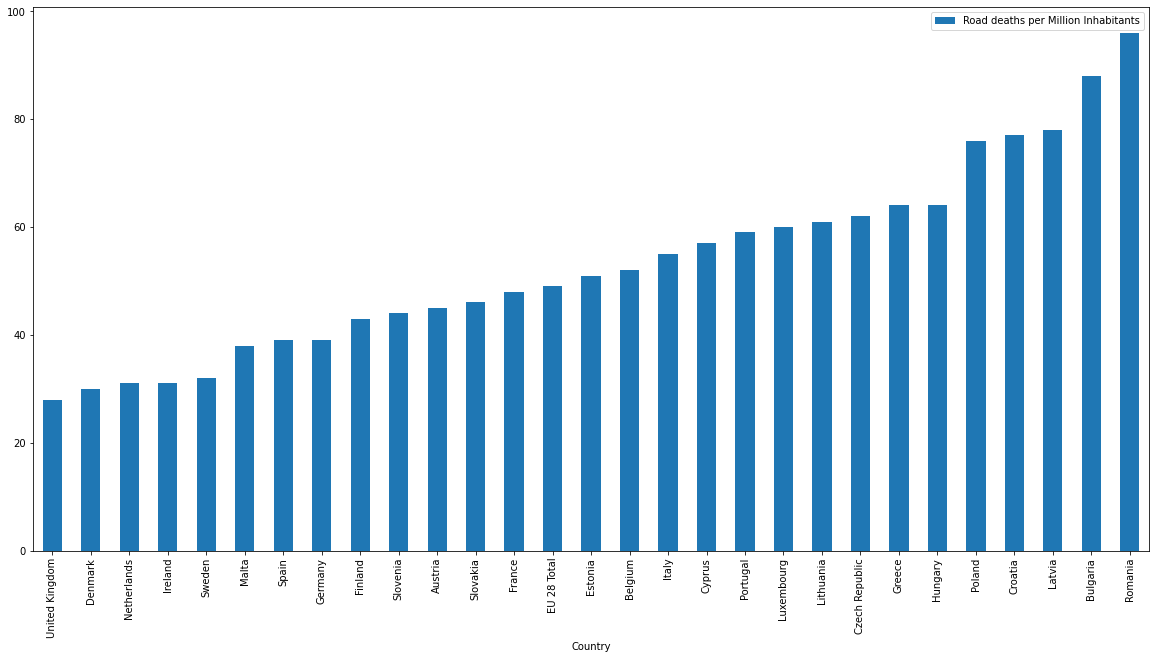

In [ ]:
data.plot(kind="bar", x='Country', y='Road deaths per Million Inhabitants', figsize=(20, 10))